# The Simulator Class

The most convenient way to use ``hera_sim`` is to use the ``Simulator`` class, which builds in all the primary functionality of the ``hera_sim`` package in an easy-to-use interface, and adds the ability to consistently write all produced effects into a ``pyuvdata.UVData`` object (and to file).

What follows is a quick tour of the main functionality this provides.

## Setup

In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u

import hera_sim
import uvtools

from hera_sim.simulate import Simulator
from hera_sim.noise import HERA_Tsky_mdl
from hera_sim.data import DATA_PATH
from hera_sim.interpolators import Beam

/home/bobby/HERA/dev/fix_tutorial/hera_sim/hera_sim/visibilities/__init__.py:27: UserWarning: PRISim failed to import.
  warnings.warn("PRISim failed to import.")
/home/bobby/HERA/dev/fix_tutorial/hera_sim/hera_sim/visibilities/__init__.py:33: UserWarning: VisGPU failed to import.
  warnings.warn("VisGPU failed to import.")
/home/bobby/HERA/dev/fix_tutorial/hera_sim/hera_sim/__init__.py:36: FutureWarning: 
In the next major release, all HERA-specific variables will be removed from the codebase. The following variables will need to be accessed through new class-like structures to be introduced in the next major release: 

noise.HERA_Tsky_mdl
noise.HERA_BEAM_POLY
sigchain.HERA_NRAO_BANDPASS
rfi.HERA_RFI_STATIONS

Additionally, the next major release will involve modifications to the package's API, which move toward a regularization of the way in which hera_sim methods are interfaced with; in particular, changes will be made such that the Simulator class is the most intuitive way of inter

## The Simulator Class

The ``Simulator`` class holds everything required to generate and do basic analysis on a simulation. It can be instantiated by submitting any one of the following: a filename pointing to an existing simulation in uvfits, uvh5 or miriad format; a ``UVData`` object, or a set of keyword arguments which are passed to the ``hera_sim.io.empty_uvdata`` function. Any keyword arguments passed to the ``Simulator`` initializer are passed directly to the ``hera_sim.io.empty_uvdata``, and those are in turn passed directly to the ``pyuvsim.simsetup.initialize_uvdata_from_keywords`` function, so that setting up a simulation object is relatively straightforward. The default parameter values for the ``empty_uvdata`` function are all set to ``None``, but are given default values to show a suggested minimal set of parameters necessary to initialize a ``UVData`` object (and, in turn, a ``Simulator`` object):
```
hera_sim.io.empty_uvdata(
    Ntimes=None,
    start_time=None,
    integration_time=None,
    Nfreqs=None,
    start_freq=None,
    channel_width=None,
    array_layout=None,
    **kwargs,
)
```
If you are curious about the full set of parameters that may be used to initialize a ``UVData`` object, then please see the documentation for the ``pyuvsim.simsetup.initialize_uvdata_from_keywords`` function.

To get us started, let's make a ``Simulator`` object with 100 frequency channels spanning from 100 to 200 MHz, a half-hour of observing time with an H1C-appropriate integration time of 10.7 seconds, and a 7-element hexagonal array.

In [2]:
# first, generate the array. this is returned as a dict 
# with antenna numbers as keys and ENU positions as values
ants = hera_sim.antpos.hex_array(2, split_core=False, outriggers=0)

# for clarity about some timing parameters
start_time = 2458115.9 # JD
integration_time = 10.7 # seconds
Ntimes = int(30 * u.min.to("s") / integration_time)

sim = Simulator(
    Nfreqs=100,
    start_freq=1e8,
    bandwidth=1e8,
    Ntimes=Ntimes,
    start_time=start_time, 
    integration_time=integration_time, 
    array_layout=ants
)

The ``Simulator`` class adds some attributes for conveniently accessing metadata: 
  
You can retrieve the frequencies (in GHz) with the ``freqs`` attribute. (``sim.freqs``)  
You can retrieve the LSTs (in radians) with the ``lsts`` attribute. (``sim.lsts``)  
You can retrieve the antenna array with the ``antpos`` attribute. (``sim.antpos``)  

In [3]:
sim.freqs

array([0.1  , 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107, 0.108,
       0.109, 0.11 , 0.111, 0.112, 0.113, 0.114, 0.115, 0.116, 0.117,
       0.118, 0.119, 0.12 , 0.121, 0.122, 0.123, 0.124, 0.125, 0.126,
       0.127, 0.128, 0.129, 0.13 , 0.131, 0.132, 0.133, 0.134, 0.135,
       0.136, 0.137, 0.138, 0.139, 0.14 , 0.141, 0.142, 0.143, 0.144,
       0.145, 0.146, 0.147, 0.148, 0.149, 0.15 , 0.151, 0.152, 0.153,
       0.154, 0.155, 0.156, 0.157, 0.158, 0.159, 0.16 , 0.161, 0.162,
       0.163, 0.164, 0.165, 0.166, 0.167, 0.168, 0.169, 0.17 , 0.171,
       0.172, 0.173, 0.174, 0.175, 0.176, 0.177, 0.178, 0.179, 0.18 ,
       0.181, 0.182, 0.183, 0.184, 0.185, 0.186, 0.187, 0.188, 0.189,
       0.19 , 0.191, 0.192, 0.193, 0.194, 0.195, 0.196, 0.197, 0.198,
       0.199])

In [4]:
sim.lsts

array([4.58108965, 4.58186991, 4.58265017, 4.58343042, 4.58421068,
       4.58499094, 4.58577119, 4.58655145, 4.58733171, 4.58811196,
       4.58889222, 4.58967247, 4.59045273, 4.59123299, 4.59201324,
       4.5927935 , 4.59357376, 4.59435401, 4.59513427, 4.59591452,
       4.59669478, 4.59747504, 4.59825529, 4.59903555, 4.59981581,
       4.60059606, 4.60137632, 4.60215657, 4.60293683, 4.60371709,
       4.60449734, 4.6052776 , 4.60605786, 4.60683811, 4.60761837,
       4.60839863, 4.60917888, 4.60995914, 4.6107394 , 4.61151965,
       4.61229991, 4.61308017, 4.61386042, 4.61464068, 4.61542093,
       4.61620119, 4.61698145, 4.6177617 , 4.61854196, 4.61932222,
       4.62010247, 4.62088273, 4.62166299, 4.62244324, 4.6232235 ,
       4.62400375, 4.62478401, 4.62556427, 4.62634452, 4.62712478,
       4.62790503, 4.62868529, 4.62946555, 4.6302458 , 4.63102606,
       4.63180632, 4.63258657, 4.63336683, 4.63414709, 4.63492734,
       4.6357076 , 4.63648786, 4.63726811, 4.63804837, 4.63882

In [5]:
sim.antpos

{0: array([-7.30000000e+00,  1.26439709e+01, -4.36185665e-09]),
 1: array([ 7.30000000e+00,  1.26439709e+01, -3.99203159e-09]),
 2: array([-1.46000000e+01,  6.98581573e-09, -4.65185394e-09]),
 3: array([ 0.00000000e+00,  7.20559015e-09, -4.28202888e-09]),
 4: array([ 1.46000000e+01,  7.42536457e-09, -3.91220382e-09]),
 5: array([-7.30000000e+00, -1.26439709e+01, -4.57202631e-09]),
 6: array([ 7.30000000e+00, -1.26439709e+01, -4.20220125e-09])}

You can also generate a plot of the array layout using the ``plot_array`` method:

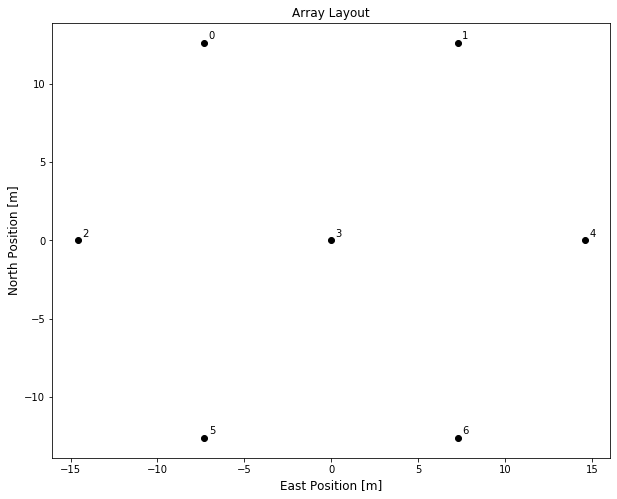

In [6]:
fig = sim.plot_array()
plt.show()

The ``data`` attribute can be used to access the ``UVData`` object used to store the simulated data and metadata:

In [7]:
from pyuvdata import UVData
isinstance(sim.data, UVData)

True

We'll use a standard waterfall plot throughout the notebook to show the progress of the simulation:

In [8]:
def waterfall(
    vis, freqs=sim.freqs * 1e3, lsts=sim.lsts, 
    vmax=None, vrange=None, title=None,
):
    """
    A wrapper around the uvtools' waterfall function providing some
    extra labelling and plot adjustment.
    """
    fig, ax = plt.subplots(
        2,1, sharex=True, sharey=True, figsize=(12,10)
    )
    
    if title is not None:
        ax[0].set_title(title, fontsize=12)
    plt.sca(ax[0])
    uvtools.plot.waterfall(
        vis, mode='log', mx=vmax, drng=vrange,
        extent=(freqs.min(), freqs.max(), lsts.min(), lsts.max())
    )
    plt.colorbar(label=r'log$_{10}$(Vis/Jy)')
    plt.ylabel("LST", fontsize=12)
    
    plt.sca(ax[1])
    uvtools.plot.waterfall(
        vis, 
        mode='phs',
        cmap='twilight',
        extent=(freqs.min(), freqs.max(), lsts.min(), lsts.max())
    )
    plt.colorbar(label='Phase [rad]')
    plt.xlabel("Frequency [MHz]", fontsize=12)
    plt.ylabel("LST", fontsize=12)


## Adding Effects

Effects may be added to a simulation by using the ``add`` method. This method takes one argument and variable keyword arguments: the required argument ``component`` may be either a string identifying the name of a ``hera_sim`` class (or an alias thereof, see below), or a callable object that has either ``lsts`` or  ``freqs`` (or both) as a parameter(s) and returns an object with shape (``lsts.size``, ``freqs.size``) or (``freqs.size``,) (granted, the ``Simulator`` does not do a check on the input parameters or the shape of returned values, but passing a callable object that returns something incorrectly shaped will likely result in an exception being raised). Let's walk through an example.

### A Simple Example

Let's begin by simulating diffuse foregrounds. To do this, we'll need to specify a sky temperature model and a beam area interpolator object (or array of values corresponding to a frequency-dependent beam size). Let's use the sky temperature model and beam polynomial fit for H1C:

In [9]:
from hera_sim.interpolators import Beam
from hera_sim.noise import HERA_Tsky_mdl
from hera_sim.data import DATA_PATH

# HERA_Tsky_mdl is a dictionary with keys 'xx' and 'yy'
Tsky_mdl = HERA_Tsky_mdl['xx']

# there are useful files in the data directory, with this being one
beamfile = os.path.join(DATA_PATH, "HERA_H1C_BEAM_POLY.npy")

# we can make a beam interpolation object from a path to a .npy file
omega_p = Beam(beamfile)

# now to add the foregrounds
sim.add("diffuse_foreground", Tsky_mdl=Tsky_mdl, omega_p=omega_p)

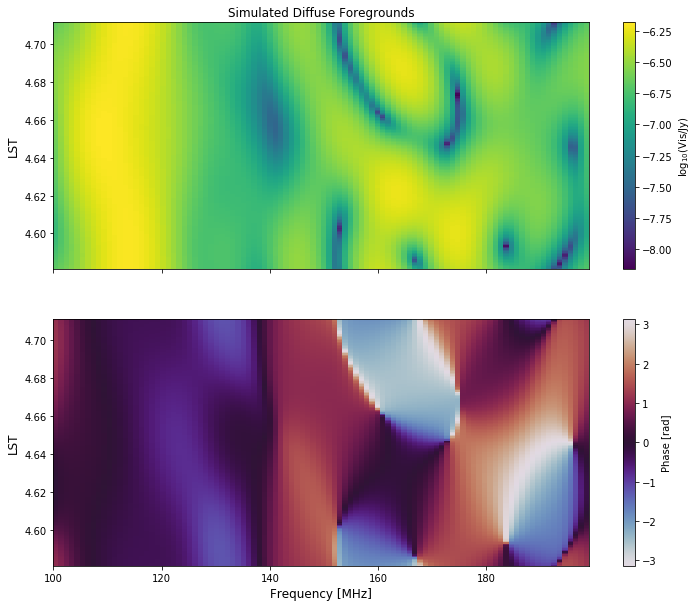

In [10]:
# let's check out the data for the (0,1) baseline
vis = sim.data.get_data((0,1,'xx'))
waterfall(vis, title='Simulated Diffuse Foregrounds')

Now, whenever an effect is simulated using the ``add`` method, that effect (and any non-default optional parameters used) is logged: a note of what was simulated is put into the object's history, and the information is also stored in a hidden attribute ``_components``.

In [11]:
print(sim.data.history)

hera_sim v1.0.0: Added DiffuseForeground using kwargs:
Tsky_mdl = <hera_sim.interpolators.Tsky object at 0x7fb870d28b50>
omega_p = <hera_sim.interpolators.Beam object at 0x7fb86dbd3390>



In [12]:
sim._components

{'diffuse_foreground': {'Tsky_mdl': <hera_sim.interpolators.Tsky at 0x7fb870d28b50>,
  'omega_p': <hera_sim.interpolators.Beam at 0x7fb86dbd3390>}}

Note that the actual visibility simulated is not cached, but rather the parameters necessary for recreating are saved and can be used to later re-simulate the effect. Now, the diffuse foreground simulator uses a random number generator, so if we want to ensure repeatability, we have to make sure it's seeded in some repeatable way...

In [13]:
# refresh the simulation
# this zeros the data array, resets the history, and clears the _components dictionary
sim.refresh()

from hera_sim.foregrounds import DiffuseForeground
# now let's seed by redundant group
sim.add(DiffuseForeground, Tsky_mdl=Tsky_mdl, omega_p=omega_p, seed_mode="redundantly")

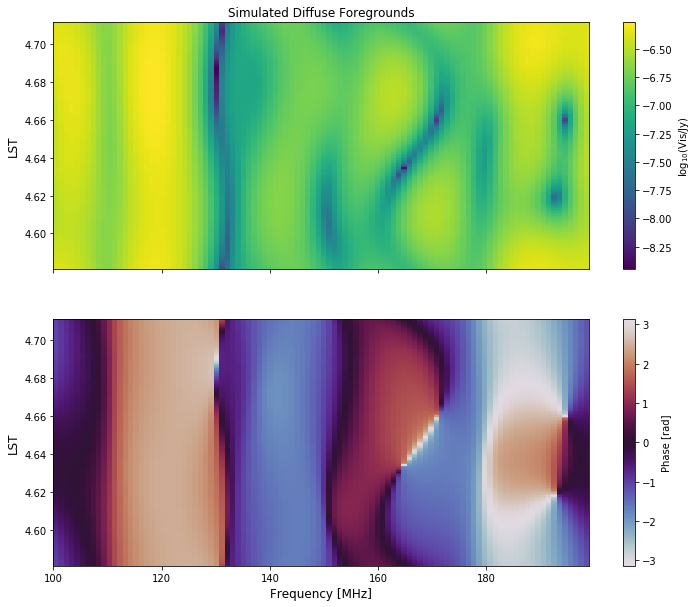

In [14]:
# and let's take a look
vis = sim.data.get_data((0,1,'xx'))
waterfall(vis, title='Simulated Diffuse Foregrounds')

In [15]:
# as for the history
print(sim.data.history)

hera_sim v1.0.0: Added DiffuseForeground using kwargs:
Tsky_mdl = <hera_sim.interpolators.Tsky object at 0x7fb870d28b50>
omega_p = <hera_sim.interpolators.Beam object at 0x7fb86dbd3390>
seed_mode = redundantly



In [16]:
# and the _components
sim._components

{hera_sim.foregrounds.DiffuseForeground: {'Tsky_mdl': <hera_sim.interpolators.Tsky at 0x7fb870d28b50>,
  'omega_p': <hera_sim.interpolators.Beam at 0x7fb86dbd3390>,
  'seed_mode': 'redundantly'}}

Note that using the ``DiffuseForeground`` class to simulate the effect caused the ``Simulator`` to log the component using the class itself as the key.

In [17]:
# we can even re-simulate the effect
vis_copy = sim.get(DiffuseForeground, ant1=0, ant2=1, pol='xx')
np.all(np.isclose(vis,vis_copy))

True

In [18]:
# but do baselines within a redundant group agree?
for reds in sim._get_reds():
    red_grp = [sim.data.baseline_to_antnums(red) for red in reds]
    print(list(red_grp))

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6)]
[(0, 1), (2, 3), (3, 4), (5, 6)]
[(0, 2), (1, 3), (3, 5), (4, 6)]
[(0, 3), (1, 4), (2, 5), (3, 6)]
[(0, 4), (2, 6)]
[(0, 5), (1, 6)]
[(0, 6)]
[(1, 2), (4, 5)]
[(1, 5)]
[(2, 4)]


In [19]:
np.all(
    np.isclose(sim.data.get_data(0,1), sim.data.get_data(2,3))
)

True

A final note on this: when the ``seed_mode`` parameter is set to ``"redundantly"``, a seed is generated for each redundant group, and that seed is used to ensure that each baseline within a redundant group observes the same realization of the effect; the only other mode that's currently supported is ``"once"``, which just seeds the random number generator once before any effects are simulated.

### Filtering Effects

The ``add`` method also allows for an optional keyword argument ``vis_filter``. This may be an iterable of arbitrary length, or an iterable of keys of various lengths. This is still under-developed and may have a different implementation in the near future, so this section will not go into any detail about how it works.

As a quick example, let's choose our filter so that only the ``'xx'`` polarization for the baseline ``(0,1)`` (and its conjugate) is simulated. To check that it works, we'll test that the antennas' autoc

In [20]:
sim.refresh()
sim.add("noiselike_eor", vis_filter=(0,1,'xx'))
np.all(sim.data.get_data(0,0,'xx') == 0)

True

In [21]:
np.all(sim.data.get_data(0,1,'xx') != 0) and np.all(sim.data.get_data(1,0,'xx') != 0)

True

### Ordering of Effects

Some of the effects that can be simulated act on visibilities additively, whereas others act multiplicatively. The `Simulator` class keeps track of the order in which simulation components have been added, and issues warnings if the simulation components have been added out of order. In particular, it issues warnings if a multiplicative model is added to an empty set of visibilities or if an absolute visibility is added after a multiplicative effect has been added. Let's check it out.

In [22]:
# first, let's add a multiplicative effect
gains = sim.add("gains", seed_mode="once", ret_vis=True)

Note that you can set the ``ret_vis`` parameter to ``True`` in order to have the ``add`` method return the effect it calculated. In this case, it's a dictionary whose keys are antenna numbers and whose values are complex gains as a function of frequency.

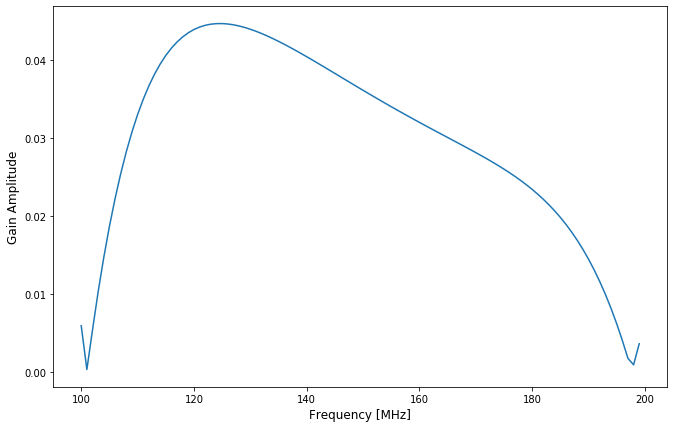

In [23]:
# take a quick peek at the gains
fig = plt.figure(figsize=(11,7))
ax = fig.add_subplot(111)
ax.plot(sim.freqs * 1e3, np.abs(gains[0]))
ax.set_xlabel("Frequency [MHz]", fontsize=12)
ax.set_ylabel("Gain Amplitude", fontsize=12)
plt.show()

Now let's try to add an additive effect, like EoR.

In [24]:
sim.add("noiselike_eor")

You are adding visibilities to a data array *after* multiplicative effects have been introduced.


Voila! The ``Simulator`` knows that a multiplicative effect (bandpass gains) have already been applied to the data and issues a warning when an additive effect is added afterward. Now let's refresh the simulation and check what happens if we try to add gains immediately after.

In [25]:
sim.refresh()

In [26]:
# now try adding a multiplicative effect to a fresh simulation
gains = sim.add("gains", seed_mode="once", ret_vis=True)

You are trying to compute a multiplicative effect, but no visibilities have been simulated yet.


In [27]:
# the effect is still simulated, but of course nothing happens
bool(gains) and np.all(sim.data.data_array == 0)

True

In [28]:
# note, however, that this warning is only issued once
sim.add("gains")

### Using Custom Components

You can also use custom-defined callable objects as simulation components. Here's an example using a function:

In [29]:
# first, make up a function
def mock_vis(lsts, freqs):
    return np.ones((lsts.size, freqs.size), dtype=np.complex)

# then refresh the sim and add the effect
sim.refresh()
sim.add(mock_vis)

You are attempting to compute a component but have not specified an ``is_multiplicative`` attribute for the component. The component will be added under the assumption that it is *not* multiplicative.


In [30]:
# and now let's see what it's logged as
print(sim.data.history)

hera_sim v1.0.0: Added mock_vis using kwargs:



In [31]:
# as for the components dictionary
sim._components

{<function __main__.mock_vis(lsts, freqs)>: {}}

Note that a warning is raised if a user-defined function (or callable class) does not have an ``is_multiplicative`` attribute&mdash;this will be the case for *all* functions, but class implementations can have such an attribute defined.

### Registering Classes

To wrap this section up, let's briefly cover how the ``Simulator`` class knows what to look for when the ``add`` method is called. All of the simulation components defined in the ``hera_sim`` repo are designed as callable classes which inherit from a ``registry``. A new ``registry`` can be created by defining a class and decorating it with the ``registry`` decorator:

In [32]:
from hera_sim import registry

@registry
class ExampleRegistry:
    is_multiplicative = False
    pass

class MockVis(ExampleRegistry):
    __aliases__ = ("mock_vis_alias",)
    def __call__(self, lsts, freqs):
        return np.ones((lsts.size, freqs.size), dtype=np.complex)

The above cell defines a new ``registry`` called ``ExampleRegistry`` and creates a class ``MockVis`` that is tracked by ``ExampleRegistry``. Since the registry has its ``is_multiplicative`` attribute set to ``False``, any class that inherits from it (and does not change the attribute's value) will also be considered an additive model.

In [33]:
ExampleRegistry._models

{'MockVis': __main__.MockVis}

In [34]:
MockVis.is_multiplicative

False

Since the ``MockVis`` class has ``"mock_vis_alias"`` as one of the entries in its ``__aliases__`` attribute, it can be discovered with that string:

In [35]:
sim.refresh()
sim.add("mock_vis_alias")

In [36]:
np.all(sim.data.data_array == 1)

True

In [37]:
print(sim.data.history)

hera_sim v1.0.0: Added MockVis using kwargs:



In [38]:
sim._components

{'mock_vis_alias': {}}

If you try to add a component that is not discoverable, then an exception will be raised and you'll be shown a list of known aliases:

In [39]:
# show the message this way to let the rest of the kernel run
try:
    sim.add("not_a_known_model")
except AttributeError as err:
    print(err)

The component 'not_a_known_model' wasn't found. The following aliases are known: cross_coupling_xtalk, thermal_noise, noiselikeeor, gen_gains, gen_reflection_gains, impulse, gen_cross_coupling_xtalk, diffuseforeground, rfi_dtv, sigchain_reflections, rfi_impulse, diffuse_foreground, gen_whitenoise_xtalk, white_noise_xtalk, dtv, pointsourceforeground, hexarray, bandpass, gains, stations, rfi_stations, lineararray, reflections, mockvis, thermalnoise, whitenoisecrosstalk, scatter, mock_vis_alias, crosscouplingcrosstalk, bandpass_gain, noiselike_eor, pntsrc_foreground, rfi_scatter


If you would like to see what classes are registered and discoverable by the ``Simulator`` class, then you can use the ``list_discoverable_components`` function:

In [40]:
hera_sim.list_discoverable_components()

hera_sim.antpos.LinearArray
hera_sim.antpos.HexArray
hera_sim.foregrounds.DiffuseForeground
hera_sim.foregrounds.PointSourceForeground
hera_sim.noise.ThermalNoise
hera_sim.rfi.Stations
hera_sim.rfi.Impulse
hera_sim.rfi.Scatter
hera_sim.rfi.DTV
hera_sim.sigchain.Bandpass
hera_sim.sigchain.Reflections
hera_sim.sigchain.CrossCouplingCrosstalk
hera_sim.sigchain.WhiteNoiseCrosstalk
hera_sim.eor.NoiselikeEoR
__main__.MockVis


One final caveat: currently, the ``add`` method is implemented so that an exception is raised when a user-defined function that does not exist in the global namespace is passed as the ``component``. So, if you want to import a simulation component *that is implemented as a function* from some other module, then be sure to import the function into the global namespace.

## The ``run_sim`` Method

The ``Simulator`` class also features the ``run_sim`` method, which allows you to run an entire simulation by either specifying a dictionary whose keys are strings that specify simulation components (or acceptable aliases) compatible with the ``add`` method and whose values are the optional parameter settings for the simulation components.

### An Example

Let's keep the example short and sweet: diffuse foregrounds with bandpass gains.

In [41]:
# first, refresh the simulation to reset the history and _components
sim.refresh()

# now make a dictionary of simulation parameters
sim_params = {
    "diffuse_foreground" : {
        "Tsky_mdl" : Tsky_mdl, "omega_p" : omega_p, "seed_mode" : "redundantly"
    },
    "gains" : {"seed_mode" : "once"}
}

sim.run_sim(**sim_params)

In [42]:
# and let's inspect the history
print(sim.data.history)

hera_sim v1.0.0: Added DiffuseForeground using kwargs:
Tsky_mdl = <hera_sim.interpolators.Tsky object at 0x7fb870d28b50>
omega_p = <hera_sim.interpolators.Beam object at 0x7fb86dbd3390>
seed_mode = redundantly
hera_sim v1.0.0: Added Bandpass using kwargs:
seed_mode = once



We can also use a YAML file to control the simulation. Note the use of the YAML tags ``!Tsky`` and ``!Beam``; these are defined in the ``__yaml_constructors`` module, and they use the ``Tsky`` and ``Beam`` classes, respectively, from the ``interpolators`` module to construct an interpolation object from the provided ``datafile`` (and optional ``interp_kwargs`` dictionary). Note that currently these classes assume that relative paths are intended to be relative to the ``hera_sim.data`` directory, but this behavior may change in the future.

In [43]:
# let's first make a configuration file
import tempfile
tempdir = tempfile.mkdtemp()
config = os.path.join(tempdir, "example.yaml")
with open(config, 'w') as cfg:
    cfg.write(
"""
diffuse_foreground:
    Tsky_mdl: !Tsky
        datafile: HERA_Tsky_Reformatted.npz
    omega_p: !Beam
        datafile: HERA_H1C_BEAM_POLY.npy
    seed_mode: redundantly
gains:
    seed_mode: once
"""
)
    
# now refresh the simulation and run the new simulation
sim.refresh()
sim.run_sim(config)

In [44]:
# again let's look at the history
print(sim.data.history)

hera_sim v1.0.0: Added DiffuseForeground using kwargs:
Tsky_mdl = <hera_sim.interpolators.Tsky object at 0x7fb8704b5cd0>
omega_p = <hera_sim.interpolators.Beam object at 0x7fb86e8598d0>
seed_mode = redundantly
hera_sim v1.0.0: Added Bandpass using kwargs:
seed_mode = once



In [45]:
# and the components
sim._components

{'diffuse_foreground': {'Tsky_mdl': <hera_sim.interpolators.Tsky at 0x7fb8704b5cd0>,
  'omega_p': <hera_sim.interpolators.Beam at 0x7fb86e8598d0>,
  'seed_mode': 'redundantly'},
 'gains': {'seed_mode': 'once'}}

Finally, you can return individual components from a simulation like so:

In [46]:
# return some things, but not all things
sim_params["diffuse_foreground"]["ret_vis"] = True
sim_params["pntsrc_foreground"] = {"seed_mode" : "redundantly", "ret_vis" : True}

# reorder so that multiplicative effects come last
new_sim_params = {"diffuse_foreground" : {}, "pntsrc_foreground" : {}, "gains" : {}}
new_sim_params.update(sim_params)

# refresh the simulation and run
sim.refresh()
results = dict(sim.run_sim(**new_sim_params))

In [47]:
# tada!
results.keys()

dict_keys(['diffuse_foreground', 'pntsrc_foreground'])

In [48]:
np.all(results['diffuse_foreground'].dtype == np.complex)

True

In [49]:
results['diffuse_foreground'].shape == sim.data.data_array.shape

True

In [50]:
np.all(
    np.isclose(results['diffuse_foreground'], sim.get("diffuse_foreground"))
)

True

In [51]:
sim.refresh()
sim.add("noiselike_eor", vis_filter=(0,1,'xx'))